In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import statsmodels.api as sm
import scipy.stats as stats

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df[df.duplicated]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

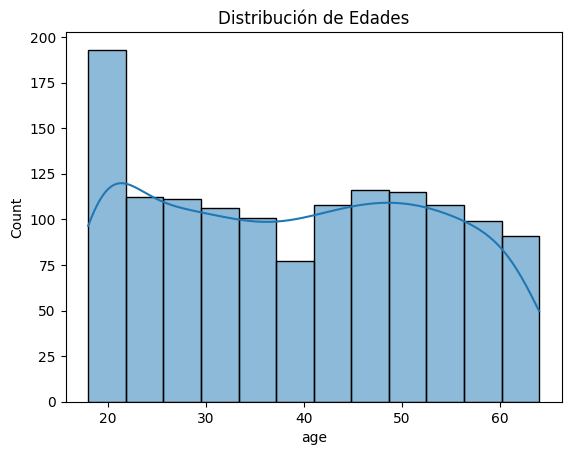

In [8]:
sns.histplot(data=df, x='age', kde=True)
plt.title('Distribución de Edades')
plt.show()

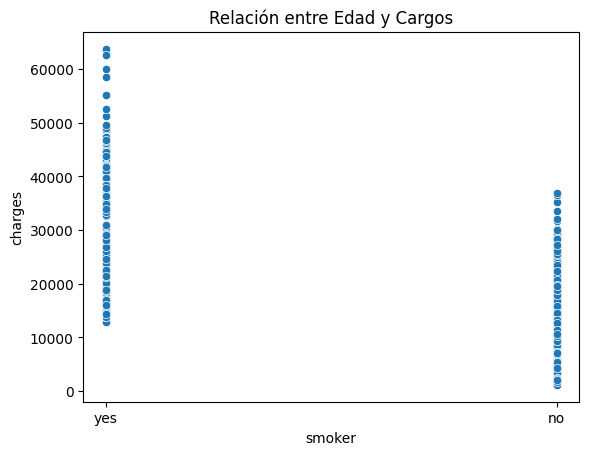

In [9]:
sns.scatterplot(data=df, x='smoker', y='charges')
plt.title('Relación entre Edad y Cargos')
plt.show()

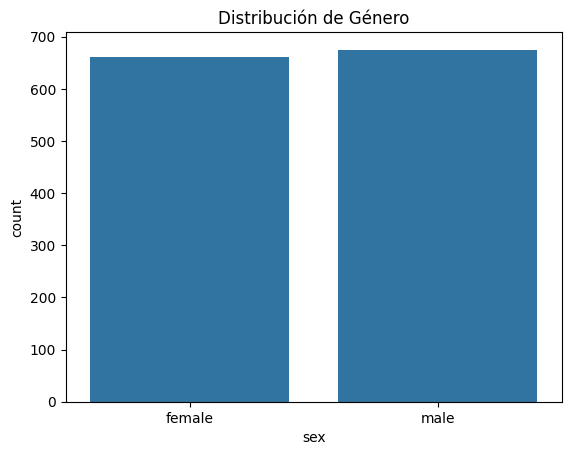

In [10]:
sns.countplot(data=df, x='sex')
plt.title('Distribución de Género')
plt.show()

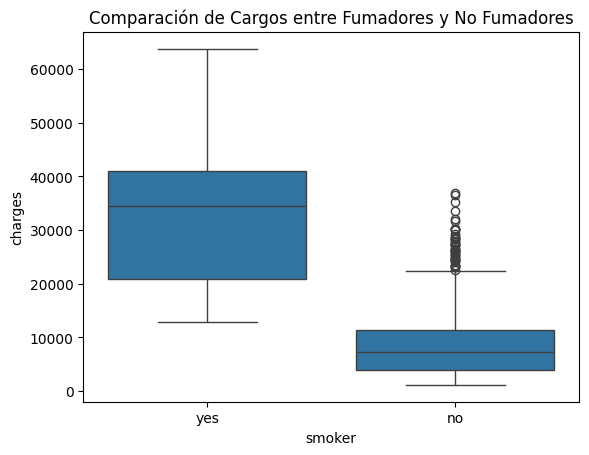

In [11]:
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Comparación de Cargos entre Fumadores y No Fumadores')
plt.show()

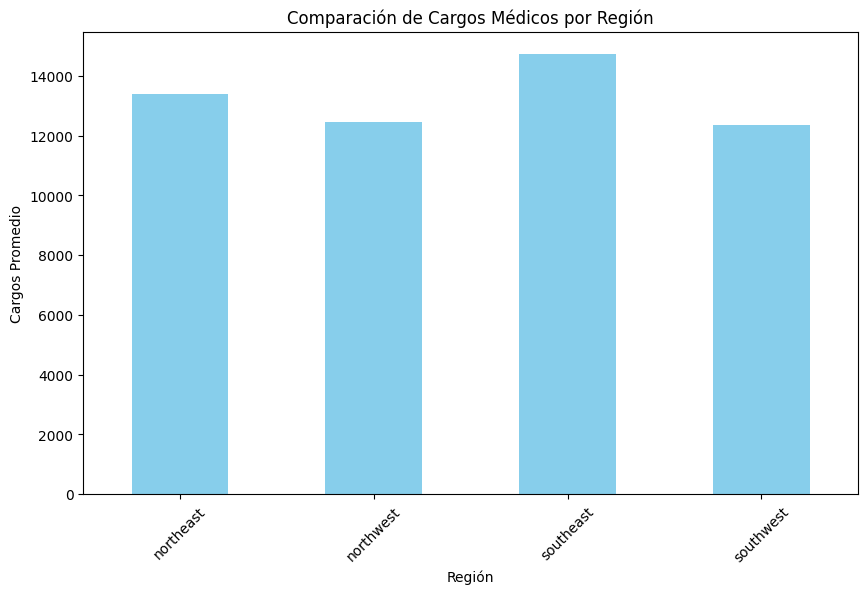

In [12]:
# Agrupa los datos por la columna 'region' y calcula el promedio de 'charges' en cada región
region_charges_mean = df.groupby('region')['charges'].mean()
# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
region_charges_mean.plot(kind='bar', color='skyblue')
plt.title('Comparación de Cargos Médicos por Región')
plt.xlabel('Región')
plt.ylabel('Cargos Promedio')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
# Muestra el gráfico
plt.show()

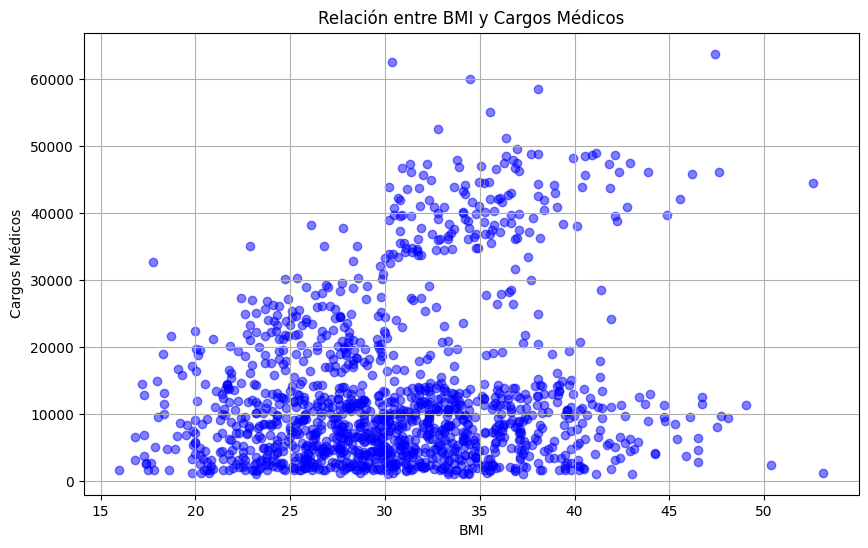

In [13]:
# Crea un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['bmi'], df['charges'], alpha=0.5, color='blue')
plt.title('Relación entre BMI y Cargos Médicos')
plt.xlabel('BMI')
plt.ylabel('Cargos Médicos')
plt.grid(True)
# Muestra el gráfico
plt.show()

In [14]:
# Supongamos que tienes un DataFrame llamado 'df'.
# Vamos a dividirlo en dos partes: una con las columnas numéricas y otra con las categóricas.
# Selecciona solo las columnas numéricas del DataFrame 'df'.
# 'include=[np.number]' le dice a pandas que solo queremos columnas que contengan números.
columnas_numericas = df.select_dtypes(include=[np.number])
# Ahora seleccionamos las columnas categóricas.
# 'include=['object', 'category']' le dice a pandas que incluya columnas de tipo objeto o categoría,
# que generalmente son las que contienen texto o categorías.
columnas_categoricas = df.select_dtypes(include=['object', 'category'])
# Convierte las columnas categóricas a un formato numérico usando 'pd.get_dummies'.
# Esto crea una nueva columna por cada categoría única en cada columna categórica.
# Por ejemplo, si una columna tiene 'rojo', 'verde', 'azul', get_dummies crea tres columnas,
# una para cada color, y pone un 1 en la columna que corresponde al color de esa fila.
categ_bin = pd.get_dummies(columnas_categoricas, columns=columnas_categoricas.columns).astype(int)
# Ahora, vamos a unir (concatenar) las columnas numéricas y las nuevas columnas categóricas.
# 'pd.concat' es una función que une DataFrames.
# Le pasamos una lista de los DataFrames que queremos unir, en este caso, 'columnas_numericas' y 'categ_bin'.
# 'axis=1' significa que queremos unirlos lado a lado (columna a columna).
# Si fuera 'axis=0', los uniríamos uno encima del otro (fila a fila).
df_new = pd.concat([columnas_numericas, categ_bin], axis=1)
# Finalmente, si quieres ver cómo quedó tu nuevo DataFrame 'datos_nueva', solo imprímelo.
df_new.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


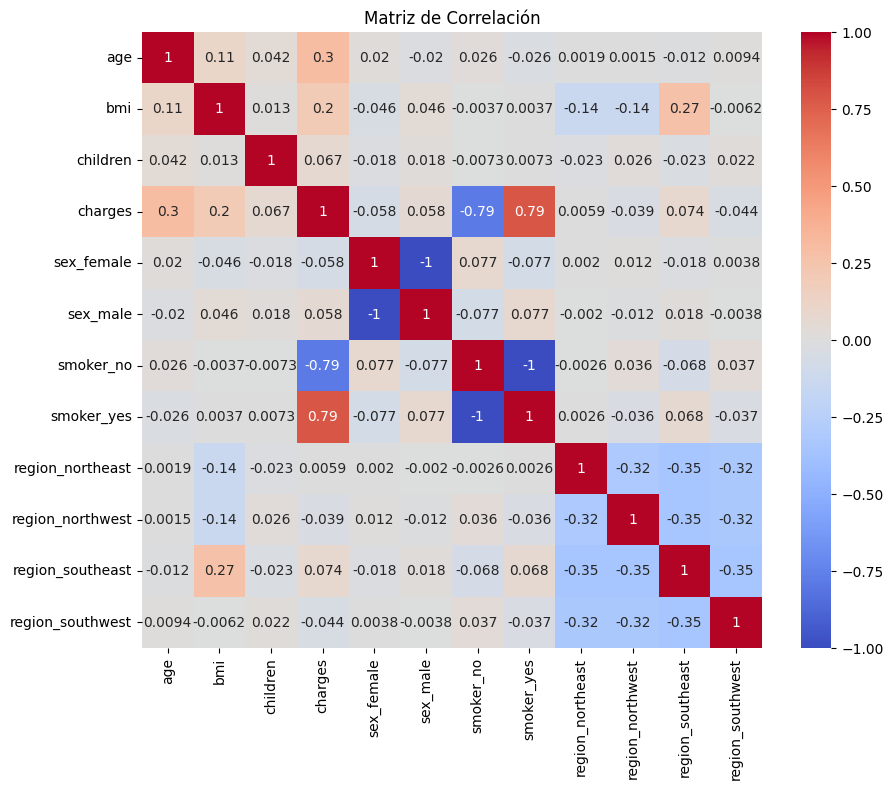

In [15]:
# Calcular la matriz de correlación
correlacion = df_new.corr()
# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [16]:
df_new = df_new[["charges", "smoker_yes", "smoker_no", "age", "bmi"]]
df_new.head()

,charges,smoker_yes,smoker_no,age,bmi
0,16884.92400,1,0,19,27.900
1,1725.55230,0,1,18,33.770
2,4449.46200,0,1,28,33.000
3,21984.47061,0,1,33,22.705
4,3866.85520,0,1,32,28.880


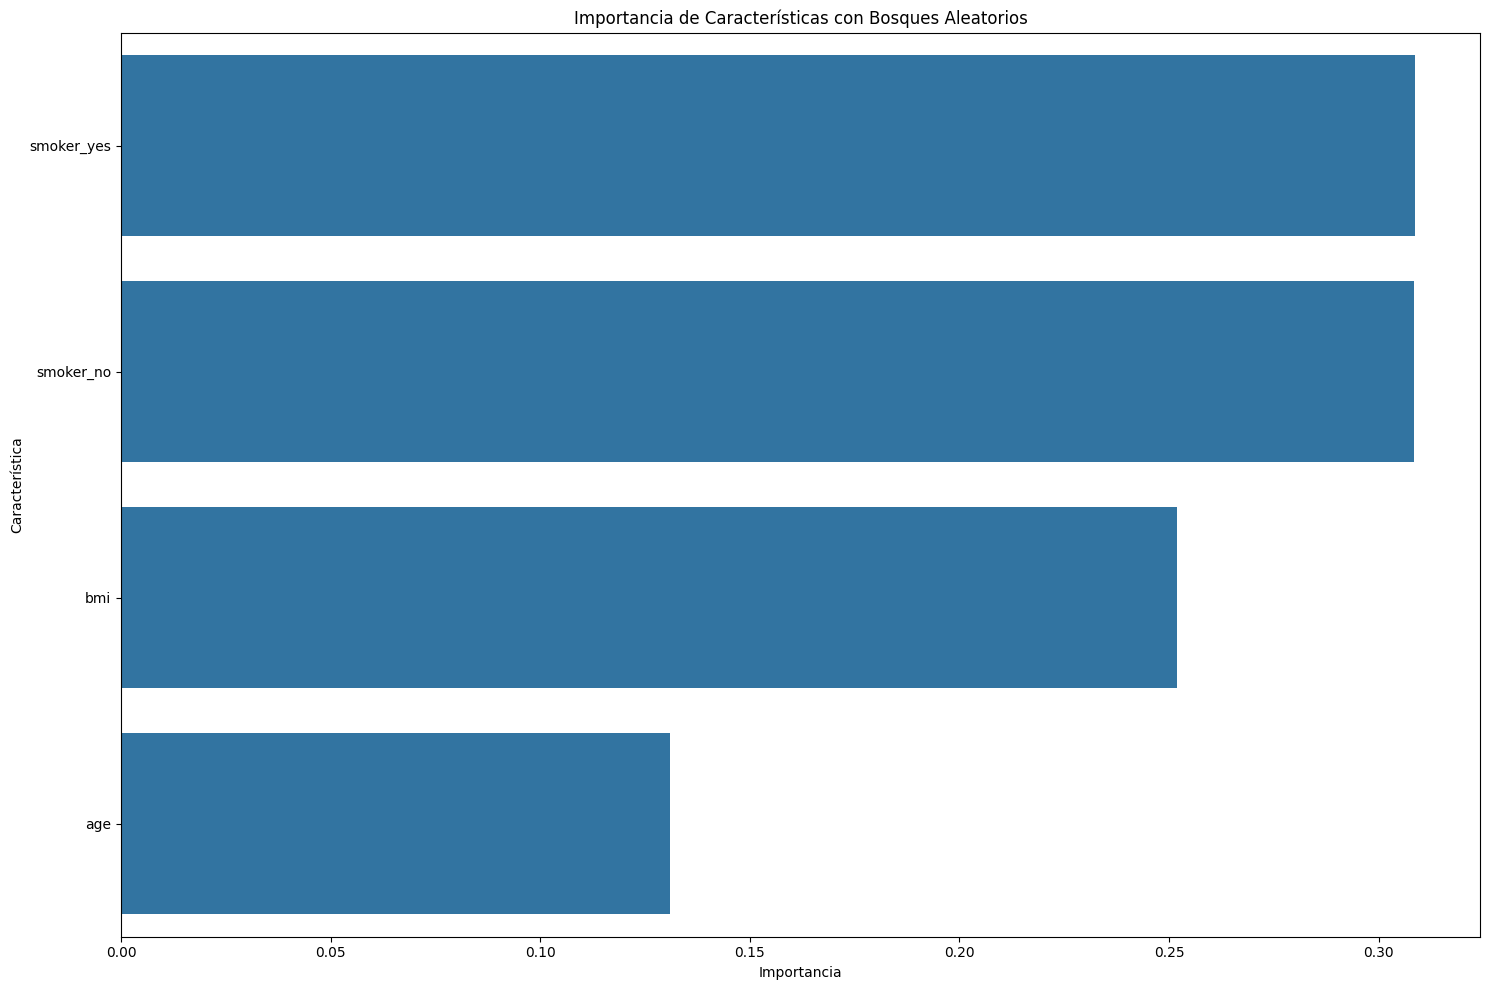

In [17]:
# Suponiendo que la columna 'y_n' es tu variable objetivo
X = df_new.drop('charges', axis=1)
y = df_new['charges']
# Crear el modelo de Bosques Aleatorios
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X, y)
# Obtener importancia de características
importancias = clf.feature_importances_
# Crear un DataFrame para visualizar las importancias
df_importancia = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': importancias
})
# Ordenar el DataFrame por importancia
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)
# Visualizar la importancia de características con un gráfico de barras
plt.figure(figsize=(15, 10))
sns.barplot(x='Importancia', y='Característica', data=df_importancia)
plt.title('Importancia de Características con Bosques Aleatorios')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

In [18]:
# Imagina que X son factores como la edad, el peso, etc., y y es el costo del seguro.
# Queremos averiguar cómo estos factores afectan el costo del seguro.
# Primero, añadimos una constante a X para tener un punto de partida.
X = sm.add_constant(X)  # Esto es como añadir una línea base en un experimento.
# Ahora, creamos un modelo para entender cómo estos factores afectan el costo del seguro.
model = sm.OLS(y, X)  # Esto es como hacer un experimento para ver la relación.
# Luego, ajustamos el modelo a nuestros datos para obtener los resultados.
results = model.fit()  # Esto es como analizar los resultados del experimento.
# Ahora, podemos usar estos resultados para entender mejor cómo los factores afectan el costo del seguro.

Vemos el Summary haciendo el print

In [19]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1314.
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:42:28   Log-Likelihood:                -13547.
No. Observations:                1337   AIC:                         2.710e+04
Df Residuals:                    1333   BIC:                         2.712e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        159.5984    627.170      0.254      0.7

Dep. Variable: charges: Estamos tratando de predecir el costo ("charges") del seguro médico.

R-squared y Adj. R-squared (0.747): Es como un puntaje en un videojuego. Nos dice cuánto de las variaciones en el costo del seguro podemos explicar con nuestro modelo. Si es 1, es perfecto (como un 100% en un examen). Aquí, es 0.747, lo que significa que nuestro modelo puede explicar el 74.7% de las variaciones en el costo del seguro, ¡lo cual es bastante bueno!

F-statistic y Prob (F-statistic): Estos números nos dicen si nuestro modelo es mejor que no tener modelo en absoluto. Si el "Prob (F-statistic)" es muy pequeño (cercano a 0), eso es bueno y significa que nuestro modelo es útil.

coef: Estos son los valores que nos dicen cuánto cambia el costo del seguro por cada cambio en nuestros factores. Por ejemplo, el coeficiente para "age" es 259.4312, lo que significa que por cada año que una persona es más vieja, el costo del seguro aumenta en aproximadamente $259.43.

std err: Es una medida de cuán confiados estamos en nuestros coeficientes. Cuanto menor sea este número, más confiados estamos.

t y P>|t|: Estos números nos ayudan a saber si un factor es relevante para predecir el costo. Si "P>|t|" es muy pequeño (cercano a 0), significa que ese factor es importante.

[0.025 0.975]: Estos son intervalos que nos dicen dónde esperamos que se encuentren los coeficientes reales la mayoría de las veces.

Omnibus: Imagina que estás tratando de adivinar el peso de las manzanas en una caja. Después de adivinar, comparas tus adivinanzas con los pesos reales. Las diferencias entre tus adivinanzas y los pesos reales se llaman residuos. Ahora, si tus adivinanzas son buenas, estos residuos se parecerán a una campana cuando los dibujes en papel. El Omnibus te dice qué tan parecido a una campana es ese dibujo. Cuanto más bajo sea el número, mejor.

Prob(Omnibus): Este es como un juego de "caliente o frío" con el Omnibus. Si este número es muy cercano a 1, significa que estás "caliente" (¡bien hecho!). Pero si es cercano a 0, como en este caso, estás "frío" (¡oh, no!).

Durbin-Watson: Imagina que después de adivinar el peso de una manzana, tu siguiente adivinanza se ve afectada por tu adivinanza anterior. Eso sería extraño, ¿verdad? Bueno, Durbin-Watson verifica precisamente eso. Si el número es cerca de 2, significa que una adivinanza no afecta la siguiente. En este caso, el número es 2.077, ¡así que estás haciendo bien!

Jarque-Bera (JB) y Prob(JB): Estos son como el Omnibus y Prob(Omnibus), pero son una forma diferente de mirar el dibujo de la campana. El JB te dice qué tan bueno es el dibujo y el Prob(JB) te dice si estás "caliente" o "frío".

Skew (Asimetría): Si cortas una manzana por la mitad, ¿las dos mitades se ven iguales? Si es así, no hay inclinación. Pero si una mitad es más grande, hay una inclinación. En este caso, la asimetría es 1.212, lo que significa que hay una pequeña inclinación en cómo se ven los residuos.

Kurtosis: Imagina que estás mirando una montaña desde lejos. ¿La montaña es puntiaguda en la cima o es más bien plana? La Kurtosis te dice eso sobre el dibujo de la campana de tus residuos. En este caso, es 5.613, lo que significa que es un poco más puntiagudo de lo normal.

Cond. No. (Número de Condición): Este número te dice si algunas de tus adivinanzas están muy relacionadas entre sí, lo que puede complicar las cosas. Un número muy grande aquí, como 3.32e+16, significa que hay que tener cuidado porque algunas adivinanzas podrían estar afectando a otras.

Aqui vemos los residuos de nuestro resultado del modelo.

In [20]:
residuos = results.resid

In [21]:
# Aquí estamos viendo cuánto se equivocó en promedio nuestro modelo.
# Los "residuos" son la diferencia entre lo que el modelo predijo y lo que realmente sucedió.
# Si el "Valor medio de los residuos" es 0, nuestro modelo es como un arquero que a veces falla a la izquierda y a veces a la derecha, pero en promedio da en el centro.
# Si es diferente de 0, es como un arquero que siempre falla hacia un lado.
print(f'Valor medio de los residuos: {residuos.mean()}')

Valor medio de los residuos: 2.550938767126762e-11


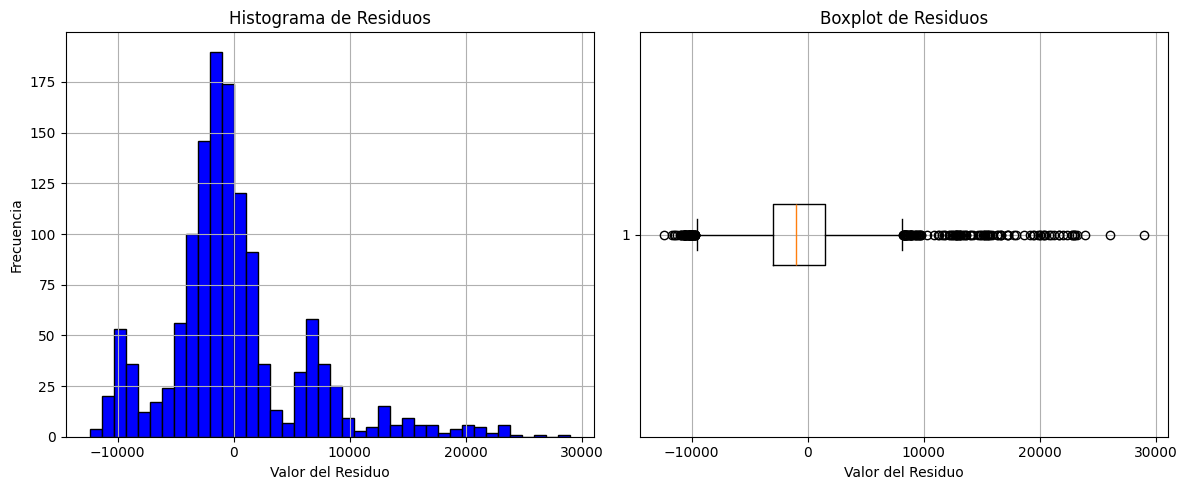

In [22]:
# Crea una figura con dos subgráficos (uno para el histograma y otro para el boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Histograma de los residuos en el primer subgráfico (ax1)
ax1.hist(residuos, bins=40, color='blue', edgecolor='black')
ax1.set_title('Histograma de Residuos')
ax1.set_xlabel('Valor del Residuo')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)
# Boxplot de los residuos en el segundo subgráfico (ax2)
ax2.boxplot(residuos, vert=False)
ax2.set_title('Boxplot de Residuos')
ax2.set_xlabel('Valor del Residuo')
ax2.grid(True)
# Muestra la figura con ambos gráficos
plt.tight_layout()  # Ajusta los márgenes para evitar superposiciones
plt.show()

En estas gráficas, estás viendo la distribución de "residuos". Los residuos son básicamente las diferencias entre lo que nuestro modelo predijo y lo que realmente sucedió. Si nuestro modelo fuera perfecto, todos los residuos serían cero, porque nuestras predicciones coincidirían exactamente con los valores reales. Pero en la vida real, siempre hay algunas diferencias.

Histograma de Residuos (a la izquierda):
Este gráfico nos muestra cuántas veces (Frecuencia) ocurrió cada valor de residuo.
La mayoría de los residuos están agrupados alrededor de 0, lo que es una buena señal. Significa que la mayoría de las veces, nuestro modelo estuvo bastante cerca de predecir el valor real.
Hay algunos residuos negativos y positivos que son muy grandes, lo que significa que hubo algunas veces que nuestro modelo se equivocó por mucho. Pero estas son menos frecuentes.

Boxplot de Residuos (a la derecha):
Este gráfico nos da una idea rápida de cómo se distribuyen los residuos.
La caja en el centro nos muestra dónde están la mayoría de los residuos. La línea naranja en el medio de la caja es la mediana, que es el valor del residuo en el medio cuando los ordenamos.

Los "bigotes" (líneas que se extienden desde la caja) nos muestran el rango en el que se encuentran la mayoría de los residuos.
Los puntos fuera de los bigotes se llaman "outliers" o valores atípicos. Estos son valores de residuos que son mucho mayores o menores que la mayoría de los otros residuos. Son casos en los que nuestro modelo se equivocó mucho.

En resumen, estos gráficos te están mostrando cómo de bueno (o malo) es tu modelo al hacer predicciones. La idea es que quieras que la mayoría de tus residuos estén cerca de 0 y que no tengas muchos valores atípicos. Si ves que muchos residuos están lejos de 0, o si tienes muchos valores atípicos, puede que quieras reconsiderar tu modelo o los datos que estás usando. ¡Es como revisar tu trabajo en un examen para asegurarte de que no cometiste muchos errores!

In [23]:
# Usamos el cubo mágico de Shapiro para ver qué tan parecidos a una campana son nuestros residuos.
# El cubo nos da dos cosas:
# 1. Un número que ahora no nos importa (lo llamamos "_").
# 2. p_value: Un juego de "caliente o frío". Si es cercano a 1, nuestras diferencias son como una campana.
# Si es cercano a 0, no se parecen mucho a una campana.
_, p_value = stats.shapiro(residuos)
# Aquí simplemente vemos el valor de "p_value" para saber si estamos "calientes" o "fríos".
p_value

2.8383262555135642e-28

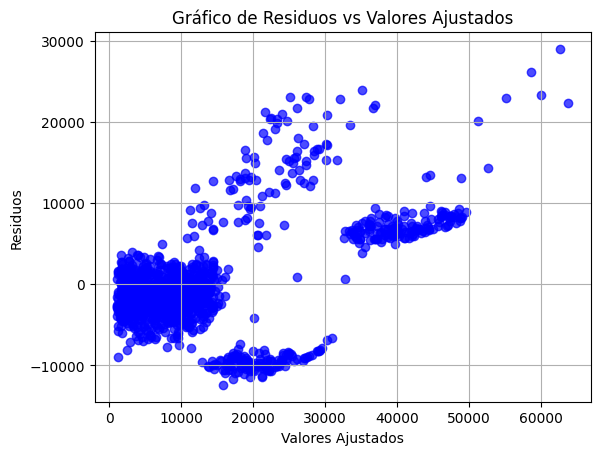

In [24]:
 # Crea el gráfico de residuos versus valores ajustados
plt.scatter(y, residuos, c='blue', alpha=0.7)
plt.title('Gráfico de Residuos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

El gráfico que estás viendo es como un juego de dardos. Imagina que tienes un dardo y un tablero. En lugar de apuntar al centro del tablero, tu objetivo es lanzar el dardo de manera que caiga justo en la línea horizontal del medio, que está marcada como "0". Esa línea del medio es como tu objetivo perfecto.
Las pelotitas azules que ves son como los lugares donde han caído tus dardos. Algunas pelotitas están cerca de la línea del medio, y otras están más lejos.

Precio seguro (Eje X): Representa cuánto predices que costará el seguro según el número de habitaciones o cualquier otro factor que estés considerando.

Residuos (Eje Y): Muestra cuánto te has desviado de tu predicción. Si una pelotita está justo en la línea del medio, significa que tu predicción fue perfecta. Pero si está arriba o abajo, significa que te has pasado o te has quedado corto en tu predicción.

Por ejemplo, si ves una pelotita azul muy arriba, significa que predijiste un precio muy bajo para ese seguro en comparación con el precio real. Y si está muy abajo, predijiste un precio muy alto.

La idea es que quieras que la mayoría de las pelotitas estén lo más cerca posible de la línea del medio. Si muchas pelotitas están dispersas por todo el lugar, significa que tus predicciones no son muy buenas. Pero si la mayoría están cerca de la línea del medio, ¡estás haciendo un buen trabajo!
En resumen, este gráfico te ayuda a ver qué tan buenas (o malas) son tus predicciones en comparación con los precios reales de los seguros.

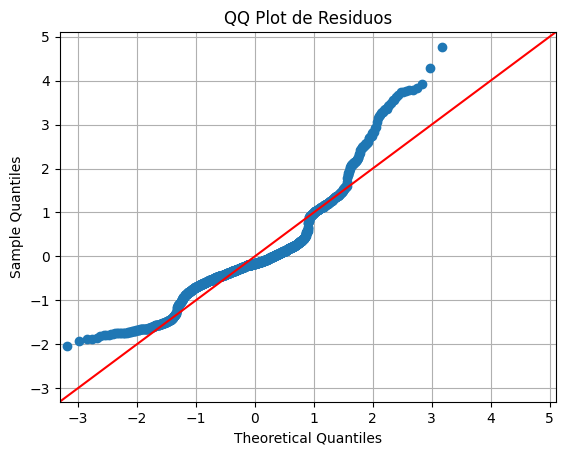

In [25]:
# Crea un QQ plot de los residuos
fig = sm.qqplot(residuos, line='45', fit=True)
plt.title('QQ Plot de Residuos')
plt.grid(True)
plt.show()

El gráfico que estás mostrando es un QQ Plot (Quantile-Quantile Plot) de los residuos. Este tipo de gráfico es utilizado para evaluar si un conjunto de datos sigue una distribución específica, en la mayoría de los casos, la distribución normal.

Aquí está lo que nos dice el QQ Plot:
Eje X (Theoretical Quantiles): Representa los cuantiles de una distribución teórica, en este caso, una distribución normal.

Eje Y (Sample Quantiles): Representa los cuantiles de los residuos de tu modelo.

Línea roja: Es la línea de referencia, que representa dónde deberían caer los puntos si los residuos siguieran perfectamente una distribución normal.
Puntos azules: Representan los residuos de tu modelo.

Cómo interpretarlo:
Si los residuos siguen perfectamente una distribución normal, los puntos azules deberían caer sobre la línea roja a través de todo el gráfico.
En tu gráfico, la mayoría de los puntos siguen la línea roja en el centro, pero se desvían en los extremos. Esto indica desviaciones de la normalidad en las colas.

La desviación en los extremos sugiere que hay residuos que tienen valores extremos (tanto en el lado positivo como en el negativo) que no son consistentes con lo que se esperaría de una distribución normal.

Conclusiones:
La desviación de los residuos de la línea roja indica que los residuos no siguen exactamente una distribución normal, especialmente en las colas. Esto podría ser una señal de que hay heteroscedasticidad en los datos o que hay valores atípicos que el modelo no está manejando bien.

Es importante recordar que muchos modelos de regresión asumen que los residuos son normalmente distribuidos, así que si los residuos se desvían significativamente de esta suposición, podría ser necesario reconsiderar el modelo o realizar algunas transformaciones en los datos.

Sin embargo, en la práctica, una pequeña desviación de la normalidad puede ser aceptable, especialmente si el tamaño de la muestra es grande. Es importante balancear la interpretación teórica del QQ Plot con el contexto práctico y el propósito del análisis.